# Задание 1
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую
принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона,
то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города,
то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}


In [8]:
import pandas as pd
import yaml

pathToConfYaml = "/Users/mac/Developer/data_sciens/python_math /hw6/conf.yaml"
tagInCsv = "keywords"

with open(pathToConfYaml) as conf:
    thisConf = yaml.load(conf)
keywords = pd.read_csv(thisConf[tagInCsv])


class GeoAnalizator:
    def __init__(self):
        self.__geo_data = {
            'Центр': ['москв', 'тул', 'ярослав'],
            'Северо-Запад': ['петербур', 'псков', 'мурманск'],
            'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
        }

    def getRegion(self, str, colName = "keyword"):
        str = str[colName]
        for key, value in self.__geo_data.items():
            for city in self.__geo_data[key]:
                if(city in str):
                    return key

        return 'undefined'


analizator = GeoAnalizator()
keywords['region'] = keywords.apply(lambda x: analizator.getRegion(x), axis=1)

# Задание 2
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [3]:
import pandas as pd
import yaml

pathToConfYaml = "/Users/mac/Developer/data_sciens/python_math /hw6/conf.yaml"

with open(pathToConfYaml) as conf:
    thisConf = yaml.load(conf)
rating = pd.read_csv(thisConf['ratings'])



def getRaiting(rating):
    if rating <= 2:
        return 'low rating'
    elif rating <= 4:
        return 'average rating'
    else:
        return 'high rating'

rating['class'] = rating.apply(lambda x: getRaiting(x['rating']), axis=1)


# Задание 3
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime
понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [7]:
import pandas as pd
import yaml

pathToConfYaml = "/Users/mac/Developer/data_sciens/python_math /hw6/conf.yaml"

with open(pathToConfYaml) as conf:
    thisConf = yaml.load(conf)
rating = pd.read_csv(thisConf['ratings'])


def getDaysBetween(start, finish):
    day = 24 * 360000
    return round((finish - start) / day , 2)

ratings_count = rating.groupby('userId').count().reset_index()
userIdOver100 = ratings_count[ratings_count['movieId'] > 100]['userId'].tolist()
minMaxTime = (rating[rating['userId'].isin(userIdOver100)]).groupby('userId').agg(['min', 'max'])['timestamp']

minMaxTime['lifetime'] = minMaxTime.apply(lambda x: getDaysBetween(x['min'], x['max']), axis=1)

# Задание 4
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

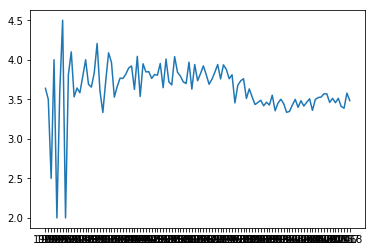

In [6]:
import pandas as pd
import yaml
import re
import matplotlib.pyplot as plt

pathToConfYaml = "/Users/mac/Developer/data_sciens/python_math /hw6/conf.yaml"

with open(pathToConfYaml) as conf:
    thisConf = yaml.load(conf)
movies = pd.read_csv(thisConf['movies'])
rating = pd.read_csv(thisConf['ratings'])

def production_year(str):
    match = re.search(r'[(](\d{4})[)]', str)
    return match[0].strip(')').strip('(') if match else '1900'


movies['year'] = movies.apply(lambda x: production_year(x['title']), axis=1)

totalFrame = rating.merge(movies, on='movieId', how='left').filter(items=['year', 'rating'])
yearRatin = totalFrame.groupby('year').mean().reset_index()


plt.plot(yearRatin['year'], yearRatin['rating'])

